In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import mglearn

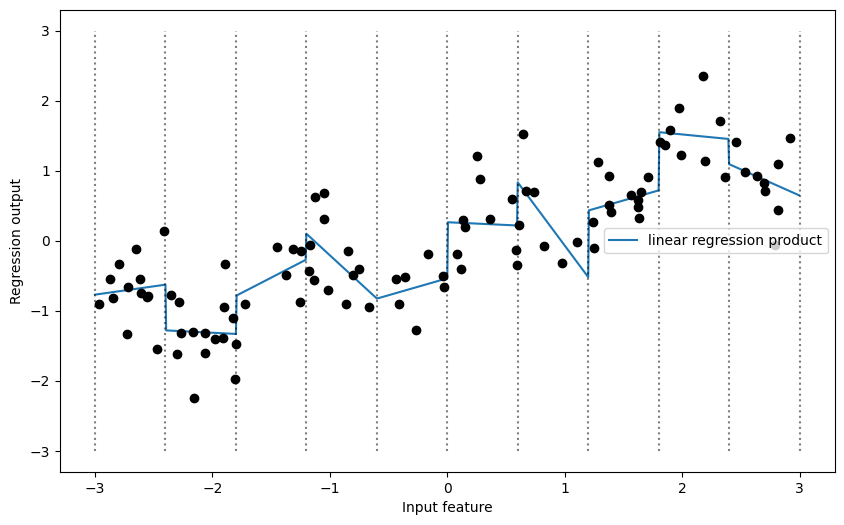

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=100)
X = pd.Series(X[:, 0])
line = np.linspace(-3, 3, 1000, endpoint=False)

# pandasでbinning
bins = np.linspace(-3, 3, 11)
a = np.linspace(-2, )
X_binned = pd.cut(X, bins=bins, include_lowest=True)
line_binned = pd.cut(line, bins=bins, include_lowest=True)

# one-hotエンコーディング
X_binned_dummies = pd.get_dummies(X_binned)
line_binned_dummies = pd.get_dummies(line_binned)

# 交互作用特徴量（各ビンごとにXの値を掛ける）
X_interactions = X_binned_dummies.multiply(X, axis=0)
line_interactions = line_binned_dummies.multiply(line, axis=0)

# 元のone-hotと交互作用特徴量を結合
# 元のone-hotには切片が入っていて、X_interactionsは係数 * Xとなっている
X_product = pd.concat([X_binned_dummies, X_interactions], axis=1)
line_product = pd.concat([line_binned_dummies, line_interactions], axis=1)

# 線形回帰
reg = LinearRegression().fit(X_product, y)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(line, reg.predict(line_product), label="linear regression product")

# ビンの境界線を描画
for bin_edge in bins:
    plt.plot([bin_edge, bin_edge], [-3, 3], ":", c="k", alpha=0.5)

plt.plot(X, y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In [4]:
from sklearn.preprocessing import OneHotEncoder

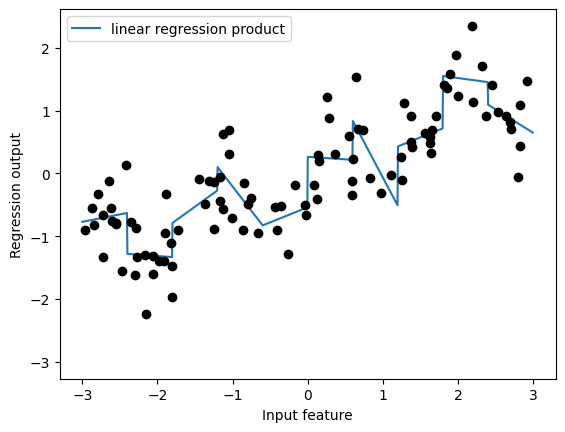

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)

line_binned = encoder.transform(np.digitize(line, bins=bins))

X_product = np.hstack([X_binned, X * X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="linear regression product")

for bin in bins:
    plt.plot([bin, bin], [-3, -3], ":", c="k")

plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# X ** 10までの多項式を加える
# デフォルトの"include_bias=True"だと、常に1となる特徴量を加える
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)


print("X_poly.shape:", X_poly.shape)

X_poly.shape: (100, 10)


In [23]:
print(X[:5])
(X_poly[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]


array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [26]:
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

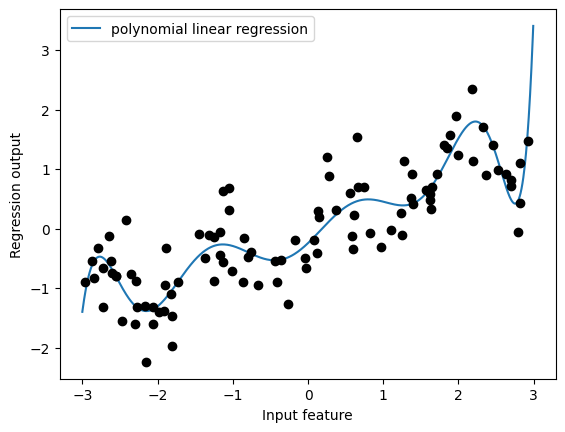

In [27]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="polynomial linear regression")
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

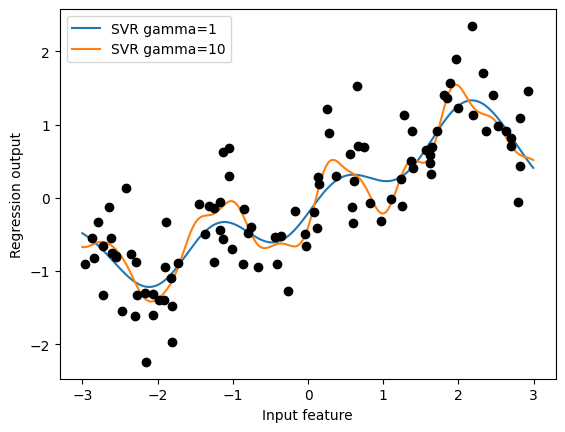

In [30]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f"SVR gamma={gamma}")

plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(california["data"], california["target"], random_state=0)

In [39]:
X_train.shape

(15480, 8)

In [37]:
# データのスケール変換
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(X_train.shape, X_train_poly.shape)

(15480, 8) (15480, 45)


In [41]:
poly.get_feature_names_out()    

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6',
       'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2'],
      dtype=object)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print(ridge.score(X_test_scaled, y_test))
ridge = Ridge().fit(X_train_poly, y_train)
print(ridge.score(X_test_poly, y_test))

0.5843245751256341
0.6052948464471688


In [ ]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print(rf.score(X_test_scaled, y_test))


rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print(rf.score(X_test_poly, y_test))

0.7914605201590355
0.8073748992992456
